In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Indore.csv')

In [3]:
data.head()

,Name,Price,Cuisine_Category,City,Region,Cuisine_Type,Timing,Rating_Types,Rating,Votes
0,Hotel Zakir,400,North Indian,Indore,Khajrana,Quick Bites,930am to 1130pm(Mon-Sun),Very Good,4.0,544
1,Shree Gurukripa,350,North Indian,Indore,Sarwate Bus Stand,Casual Dining,10am to 12midnight(Mon-Sun),Sangat Baik,4.3,1754
2,The Monroe,700,"Italian,Chinese,North Indian",Indore,New Palasia,Casual Dining,11am to 11pm(Mon-Sun),Very Good,4.4,649
3,Madhuram Sweets,300,"South Indian,Fast Food,Mithai",Indore,56 Dukan-- New Palasia,Quick Bites,7am to 11pm(Mon-Sun),Very Good,4.1,590
4,Sagar Gaire,450,"South Indian,North Indian,Fast Food",Indore,New Palasia,Quick Bites,11am to 1230AM(Mon-Sun),Very Good,4.1,2861


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1335 entries, 0 to 1334
Data columns (total 10 columns):
Name                1335 non-null object
Price               1335 non-null int64
Cuisine_Category    1335 non-null object
City                1335 non-null object
Region              1335 non-null object
Cuisine_Type        1335 non-null object
Timing              1331 non-null object
Rating_Types        1335 non-null object
Rating              1335 non-null float64
Votes               1335 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 104.4+ KB


#This means that we can make stats using Price, Votes, and Rating as only these ore of datatypes int and float 

In [5]:
data.columns

Index(['Name', 'Price', 'Cuisine_Category', 'City', 'Region', 'Cuisine_Type',
       'Timing', 'Rating_Types', 'Rating', 'Votes'],
      dtype='object')

In [6]:
data.describe()

,Price,Rating,Votes
count,1335.000000,1335.000000,1335.000000
mean,410.434457,3.447715,113.041948
std,255.840837,0.404946,218.840542
min,100.000000,2.300000,4.000000
25%,250.000000,3.200000,13.000000
50%,350.000000,3.400000,38.000000
75%,500.000000,3.700000,118.000000
max,2000.000000,4.800000,2861.000000


In [7]:
data.isna().sum()

Name                0
Price               0
Cuisine_Category    0
City                0
Region              0
Cuisine_Type        0
Timing              4
Rating_Types        0
Rating              0
Votes               0
dtype: int64

In [8]:
data.Name.value_counts().head()

Shyam Sandwich                 4
Shree Parshwanath Pan Sadan    3
Prakash Namkeen                3
Shiva Chinese Wok              3
Sapna Sandwich                 2
Name: Name, dtype: int64

# How many restaurants are located in which Region

In [9]:
data['Region'].value_counts()[:10]

Vijay Nagar             304
Bhawar Kuan             111
Old Palasia             111
New Palasia              61
Khajrana                 57
HIG-LIG                  53
Sapna Sangeeta           47
Sudama Nagar             45
MR 10 Road               38
By Pass Road (North)     38
Name: Region, dtype: int64

Text(0.5,1,'Region')

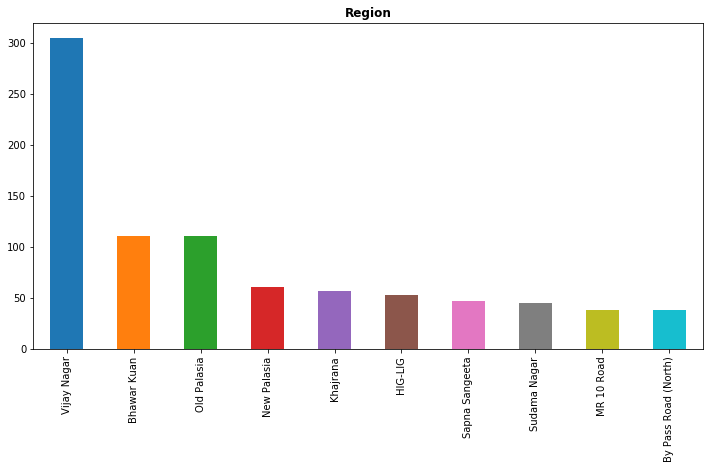

In [10]:
plt.figure(figsize=(12,6)) 
data['Region'].value_counts()[:10].plot(kind = 'bar')
plt.title('Region', weight = 'bold')

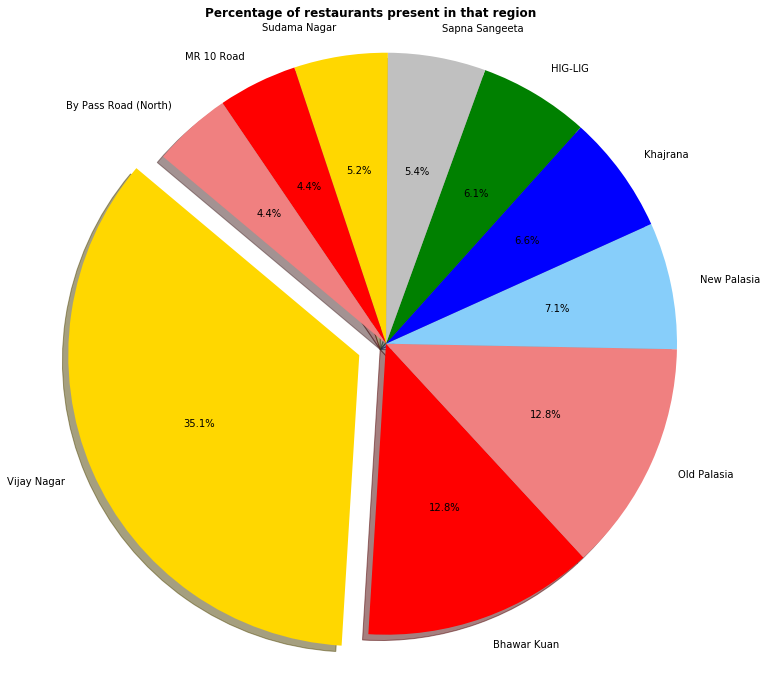

In [11]:
plt.figure(figsize = (12,12))
names = data['Region'].value_counts()[:10].index
values = data['Region'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that region", weight = 'bold')


plt.show()

In [12]:
data['Rating_Types'].value_counts().head(10)

Average          699
Good             474
Very Good        139
Excellent         12
Poor               5
Sangat Baik        1
Biasa              1
Promedio           1
Dobrze             1
Bardzo dobrze      1
Name: Rating_Types, dtype: int64

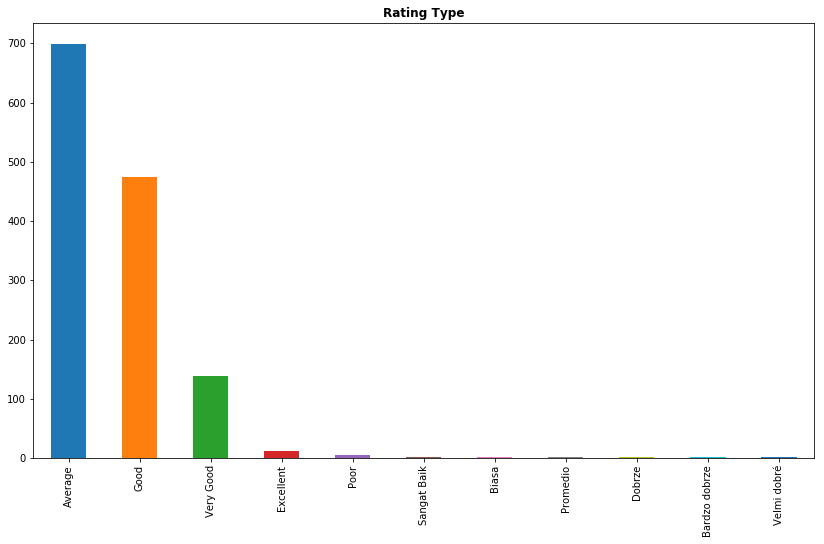

In [13]:
plt.figure(figsize = (14,8))
data.Rating_Types.value_counts()[:15].plot(kind = 'bar')
plt.title('Rating Type', weight = 'bold')
plt.show()

# Cuisine Types

In [14]:
data['Cuisine_Type'].value_counts().head(10)

Quick Bites       615
Casual Dining     289
none              116
Café              105
Bakery             46
Sweet Shop         43
Dessert Parlor     41
Beverage Shop      16
Dhaba              12
Bhojanalya         11
Name: Cuisine_Type, dtype: int64

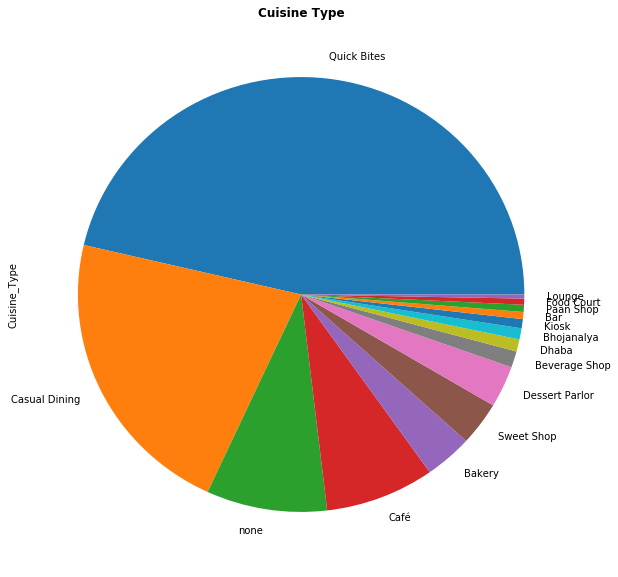

In [15]:
plt.figure(figsize = (10,10))
data.Cuisine_Type.value_counts()[:15].plot(kind = 'pie')
plt.title('Cuisine Type', weight = 'bold')
plt.show()

In [16]:
#We have the most frequently visited Restaurant type - Quickbites

# Ratings

In [17]:
data['Rating'] = data['Rating'].replace('NEW',np.NaN)
data['Rating'] = data['Rating'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)

In [18]:
data['Rating'] = data.loc[:,'Rating'].replace('[ ]','',regex = True)
data['Rating'] = data['Rating'].astype(str)
data['Rating'] = data['Rating'].apply(lambda r: r.replace('/5',''))
data['Rating'] = data['Rating'].apply(lambda r: float(r))

3.4477084898572476


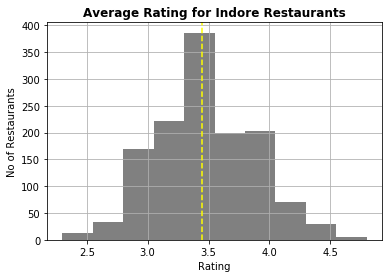

In [19]:
data.Rating.hist(color='grey')
plt.axvline(x= data.Rating.mean(),ls='--',color='yellow')
plt.title('Average Rating for Indore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(data.Rating.mean())

In [20]:
#Average rating per restaurant in Dehradun is found to be around 3.4

# Top cuisines in Gwalior

In [21]:
cuisines_count= []

for i in data.Cuisine_Category:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0,0.5,'No of restaurants')

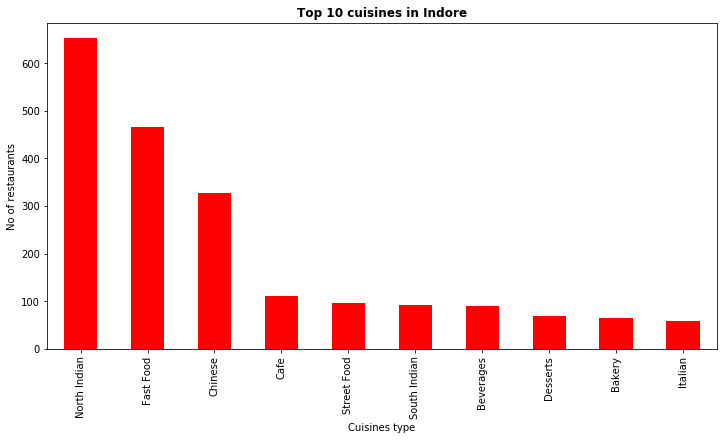

In [22]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Indore',weight='bold')
plt.xlabel('Cuisines type')
plt.ylabel('No of restaurants')

# Average Cost

In [23]:
data['Price'].value_counts()[:20]

300     255
400     205
200     168
500     123
250     105
350      65
600      60
450      59
150      53
100      50
800      32
700      30
550      20
1000     16
650      15
1200     15
900      11
1500     10
750       8
850       8
Name: Price, dtype: int64

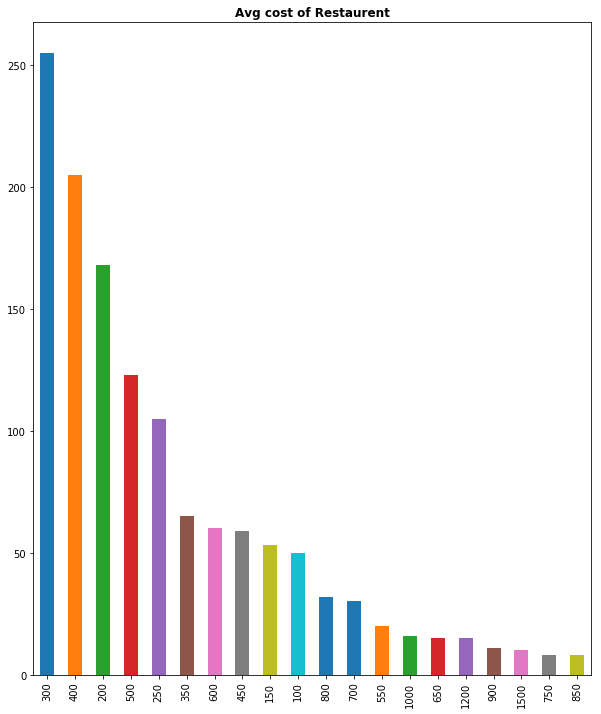

In [24]:
plt.figure(figsize = (10,12))
data['Price'].value_counts()[:20].plot(kind = 'bar')
plt.title('Avg cost of Restaurent', weight = 'bold')
plt.show()

In [25]:
colors  = ("red", "green", "orange", "cyan", "brown", "grey", "blue", "indigo", "beige", "yellow")

Text(0.5,1,'Average cost for 2 people in Rupees')

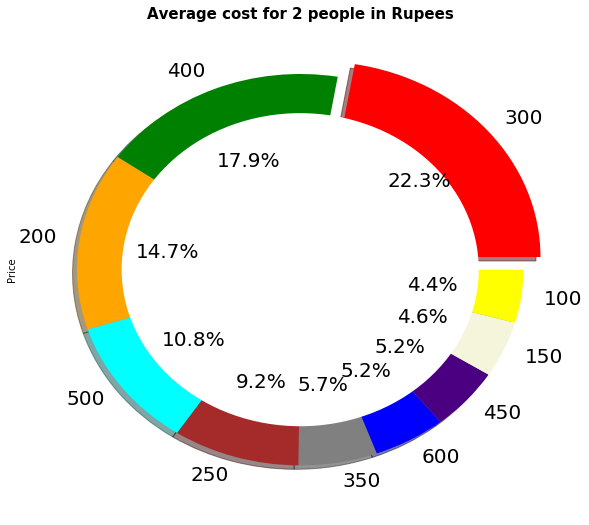

In [26]:
fig= plt.figure(figsize=(10, 9))
explode = (0.1, 0, 0, 0,0,0,0,0,0,0) 

delplot = data['Price'].value_counts()[:10].plot(kind = 'pie',autopct='%1.1f%%',fontsize=20,shadow=True,explode = explode,colors = colors)

#draw circle
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Average cost for 2 people in Rupees",fontsize = 15,weight = 'bold')

#This implies that the average price of the restaurant is 300